In [65]:
import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('books.csv', on_bad_lines='skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


DATA EXPLORATION

In [66]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [67]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Scores are between 0 and 5.Checked Datatypes of each column  and also saw there were no null values present

<Axes: xlabel='average_rating'>

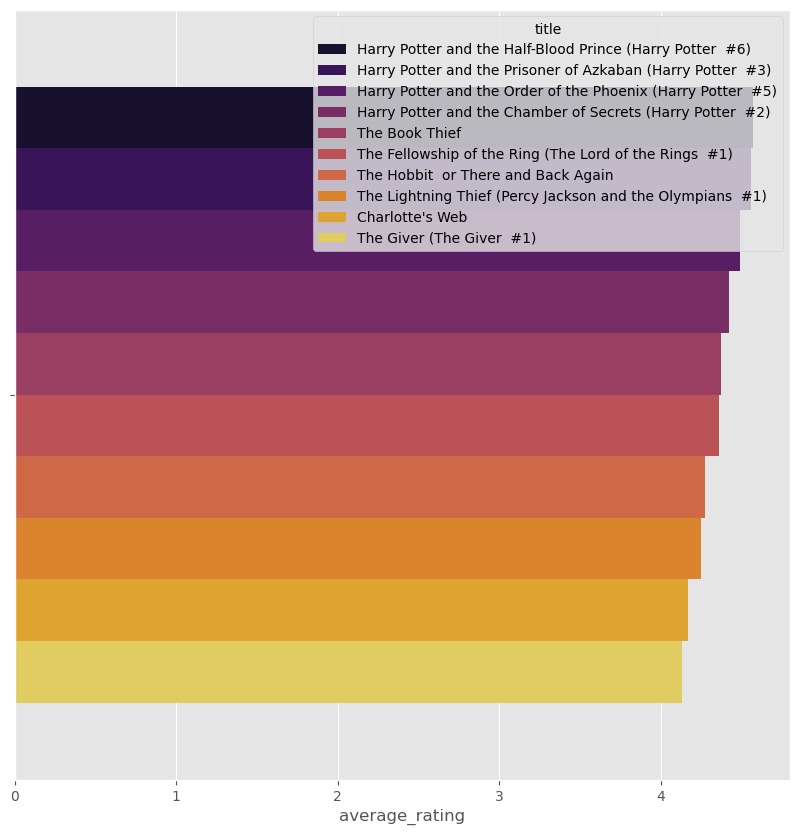

In [68]:
top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by = 'average_rating', ascending = False).head(10)
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
data = top_ten.sort_values(by = 'average_rating', ascending = False).head(10)
sns.barplot(x='average_rating', hue='title', data=data, palette='inferno')

These are the top 10 books in our data.

TOP AUTHORS ACCORDING TO NUMBER OF BOOKS WRITTEN 


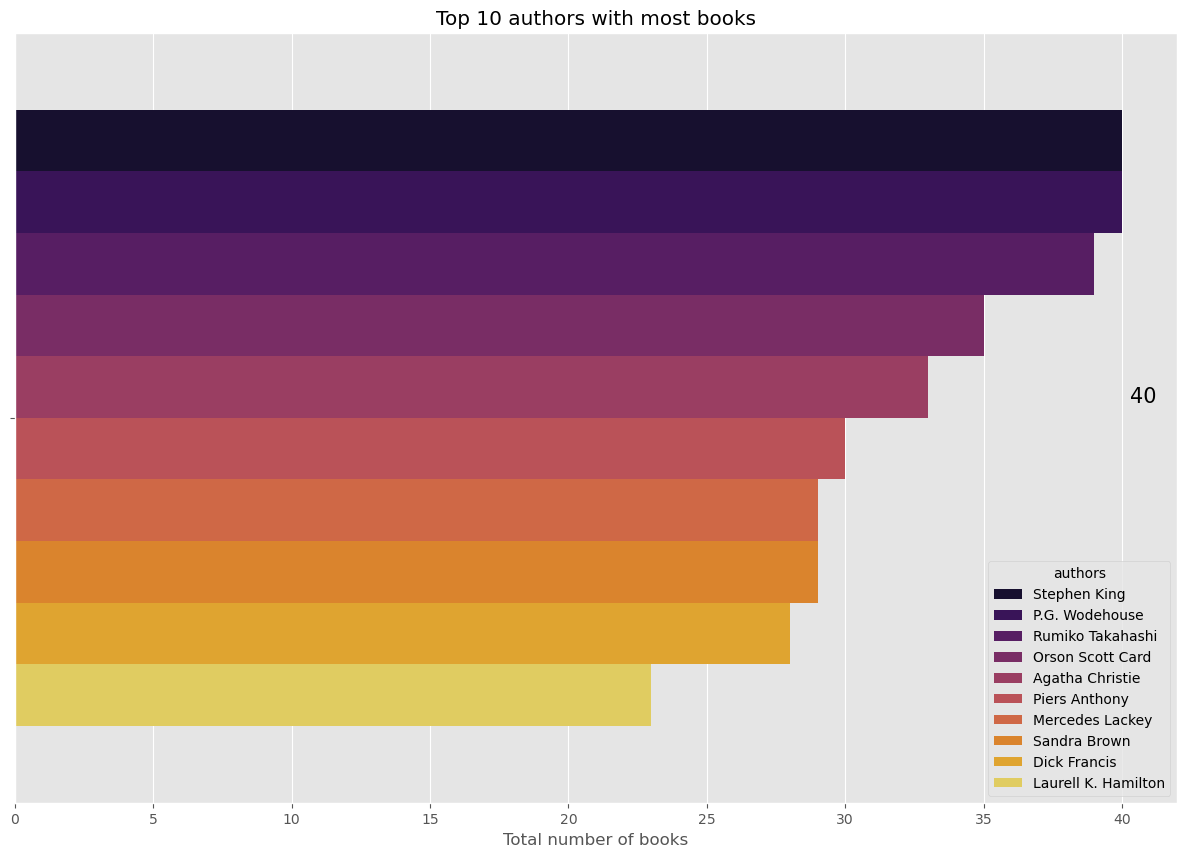

In [69]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x='title', hue=most_books.index, data=most_books, palette='inferno')
ax.set_title('Top 10 authors with most books')
ax.set_xlabel('Total number of books')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round(i.get_width())), fontsize=15, color='black')
    plt.show()

MOST COMMENTED BOOKS


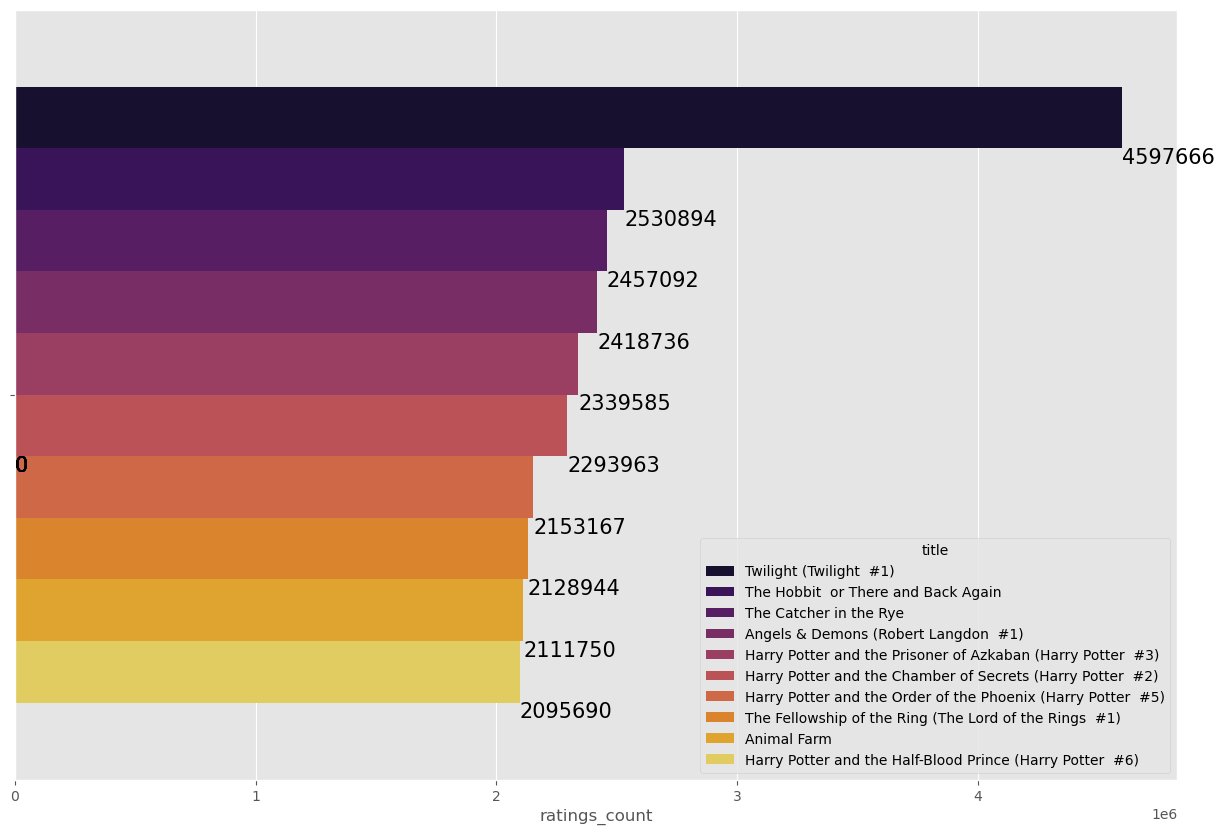

In [70]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(x='ratings_count', hue=most_rated.index, data=most_rated, palette='inferno')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.1, str(round(i.get_width())), fontsize=15, color='black')
plt.show()

Relation Between Our Average Score and Number Of Scores

Text(0.5, 0, 'Average rating')

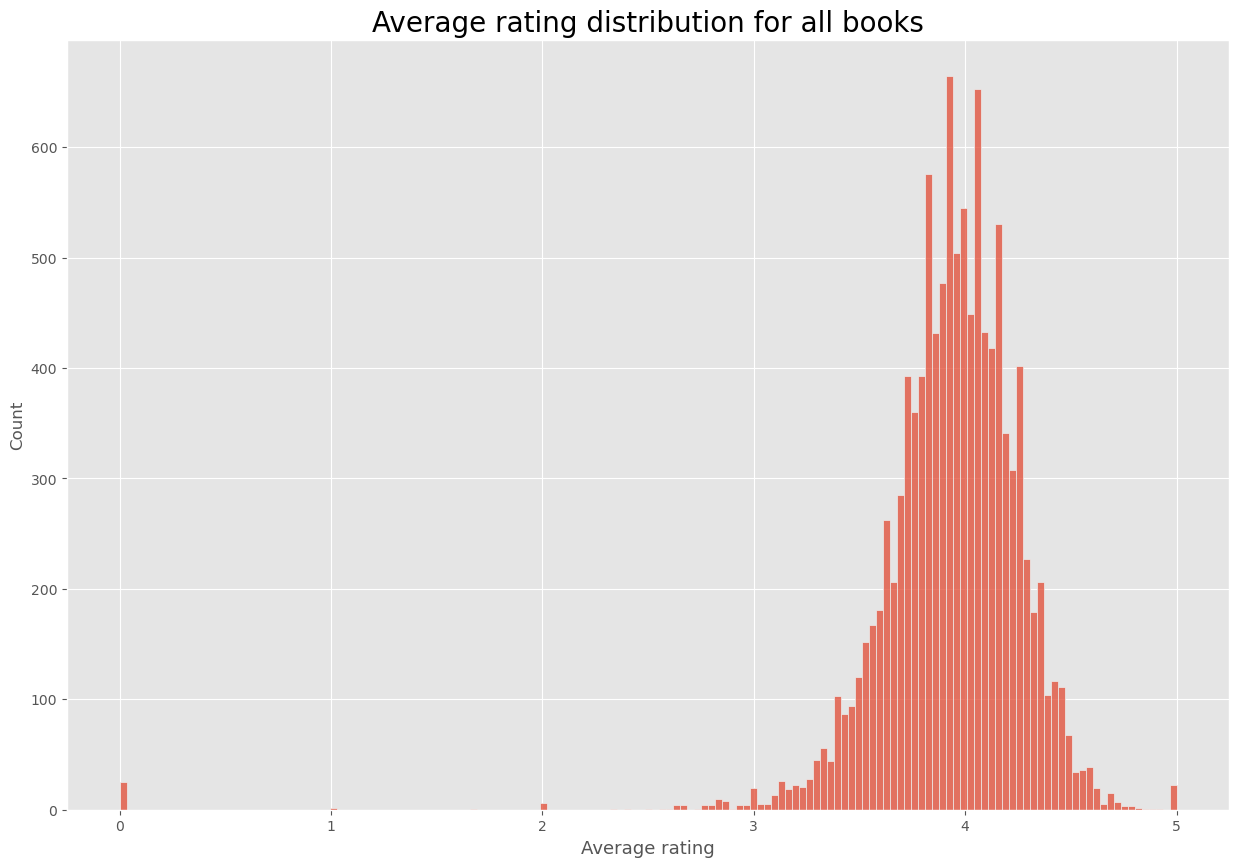

In [71]:
df.average_rating = df.average_rating.astype(float)
fig ,ax = plt.subplots(figsize=(15,10))
sns.histplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize =20)
ax.set_xlabel('Average rating',fontsize=13)

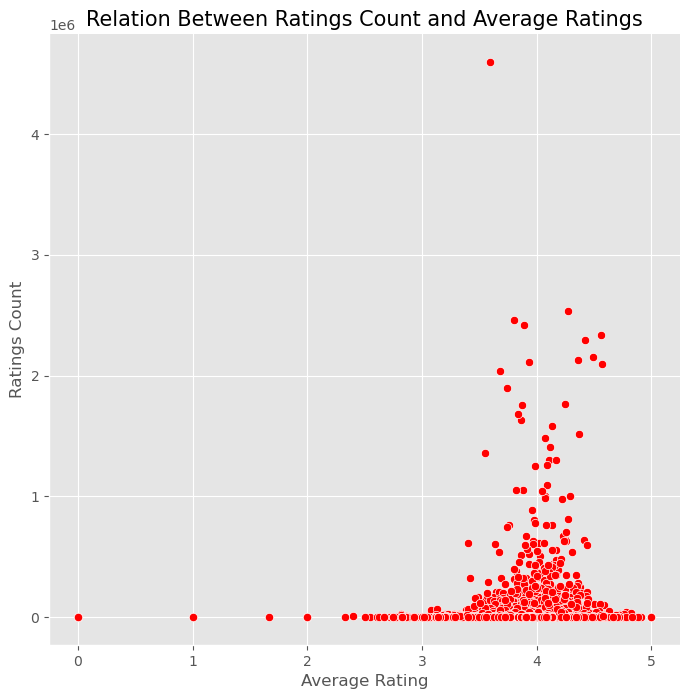

In [72]:
ax = sns.relplot(data=df, x='average_rating', y='ratings_count', color='red', sizes=(100, 200), height=7, marker='o')
plt.title('Relation Between Ratings Count and Average Ratings', fontsize=15)
ax.set_axis_labels('Average Rating', 'Ratings Count')

<Figure size 1500x1000 with 0 Axes>

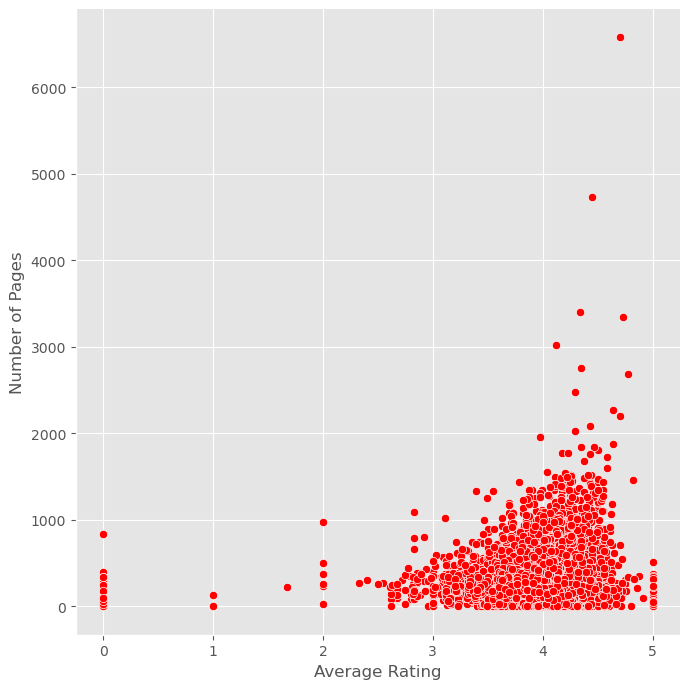

In [73]:
# Remove leading spaces from column names
df.columns = df.columns.str.strip()

plt.figure(figsize=(15,10))
ax = sns.relplot(x = "average_rating", y = "num_pages", data = df, color = 'red', sizes = (100, 200), height = 7, marker = 'o')
ax.set_axis_labels('Average Rating', 'Number of Pages')

In [74]:
#COPY OF THE DATAFRAME

df2 = df.copy()

DATA PREPARATION

In [75]:
df2.loc[(df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = 'Between 0 and 1'
df2.loc[(df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = 'Between 1 and 2'
df2.loc[(df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = 'Between 2 and 3'   
df2.loc[(df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = 'Between 3 and 4'
df2.loc[(df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = 'Between 4 and 5'

Two different dataframes

In [76]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

CONCATENATE AND RENAME AS FEATURES


In [77]:
features = pd.concat([rating_df,
                      language_df,
                      df2['average_rating'],
                      df2['ratings_count']], axis =1)

Using MinMax scaler to reduce values

In [78]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

KNN Algorithm for Book Recommendation System


In [79]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
distances, indices = model.kneighbors(features)

In [90]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    if len(book_id) == 0:
        return f"Book '{book_name}' not found in the dataset."
    book_id = book_id[0]
    for newid in indices[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

BookNames = BookRecommender('Great Expectations')
print(BookNames)

['Great Expectations', 'The Wish List', 'Bite (Anita Blake  Vampire Hunter  #8.5; Sookie Stackhouse  #5.1; Undead  #2.5; Mageverse  #1.5)', 'Manhunting', 'A Bend in the River', 'Rose Daughter']
